## **Machine Learning - WNBA Playoffs Prediction**
This notebook will focus on the undestanding of the data. We will be using SQLite to store the data due to its scalability & the fact that it's a relational schema.

https://docs.python.org/3/library/sqlite3.html

Import sqlite3 and connect to database file

### **Imports**

In [1]:
import pandas as pd
import sqlite3
import prep_utils as pu 
import raw_prep_utils as ru
import sys
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### **Database Connection Setup**

In [2]:
db = sqlite3.connect("db/ac.db")
db_cur = db.cursor()

[df_awards, df_coaches, df_players_teams, df_players, df_series_post, df_teams_post, df_teams] = pu.db_to_pandas(db)

In [3]:
final_rick = pu.calc_team_power_rat(df_players_teams,df_awards,df_players,df_teams,1)
print(final_rick.columns)
#oi = ru.merge_all_raw_data(df_teams,df_players_teams,df_coaches,df_awards,df_teams_post,1)
#print(oi.to_string())


Mean Squared Error for G: 0.26750551181102367
Feature importance for G:
fg%: 0.13736986973283197
PER: 0.10011681804838718
PPM: 0.09204548108664352
3pt%: 0.08970965032781616
ft%: 0.08204899790812684
PF: 0.08008008465505417
assists: 0.0737646328146476
turnovers: 0.06951804333452935
oRebounds: 0.055739588356566255
steals: 0.054253698769905434
dRebounds: 0.05222868341429685
blocks: 0.05055526831151798
rebounds: 0.04903757820818491
dq: 0.01275343816100356
player_awards: 0.0007781668704882285

Mean Squared Error for C-F: 0.30445555555555553
Feature importance for C-F:
blocks: 0.2491075015490768
PER: 0.10034505238810597
fg%: 0.09718590941270659
ft%: 0.08514115343130113
PPM: 0.08201583427637776
turnovers: 0.08043810080967584
assists: 0.07902137042858043
oRebounds: 0.049173000940039756
PF: 0.04204061445403843
steals: 0.03852839985430625
dRebounds: 0.037849427048893
3pt%: 0.029825018392422714
rebounds: 0.016185247077882353
dq: 0.01314336993659303
player_awards: 0.0

Mean Squared Error for C: 0.

***Prepare Coaches Dataframe***

In [4]:
df_new_coaches = pu.prepare_coaches(df_coaches, df_awards,1)
df_new_coaches = pu.group_coaches(df_new_coaches)
print(df_new_coaches.to_string())

Dropping Attribute lgID in Coaches...
Creating attribute coach previous regular season win ratio...
Creating attribute coach playoffs win ratio...
Creating attribute coach playoffs count...
Creating attribute coach awards count...
Dropping attribute post_wins..
Dropping attribute post_losses..
Dropping attribute won..
Dropping attribute lost..

Coaches Null Verification:
year                    0
tmID                    0
coachID                 0
coach_reg_season_wr     0
coach_po_season_wr      0
coach_playoffs_count    0
coach_awards            0
dtype: int64
     year tmID     coachID  coach_reg_season_wr  coach_po_season_wr  coach_playoffs_count  coach_awards
0       1  CHA  dunntr01wc             0.000000            0.000000                     0             0
1       1  CLE  hugheda99w             0.000000            0.000000                     0             0
2       1  DET  liebena01w             0.000000            0.000000                     0             0
3       1  HOU 

***Prepare Players Dataframe***


In [5]:
df_new_players_teams = pu.prepare_player_teams(df_players_teams,df_awards,1)
#df_new_players_teams['PostPER'] = ((df_new_players_teams['PostfgMade'] * 85.910) + (df_new_players_teams['PostSteals'] * 53.897) + (df_new_players_teams['PostthreeMade'] * 51.757) + (df_new_players_teams['PostftMade'] * 46.845) + (df_new_players_teams['PostBlocks'] * 39.190) + (df_new_players_teams['PostoRebounds'] * 39.190) + (df_new_players_teams['PostAssists'] * 34.677) + (df_new_players_teams['PostdRebounds'] * 14.707) - (df_new_players_teams['PostPF'] * 17.174) - ((df_new_players_teams['PostftAttempted'] - df_new_players_teams['PostftMade']) * 20.091) - ((df_new_players_teams['PostfgAttempted'] - df_new_players_teams['PostfgMade']) * 39.190) - (df_new_players_teams['PostTurnovers'] * 53.897)) * (np.where(df_new_players_teams['PostMinutes'] == 0, 0, 1 / df_new_players_teams['PostMinutes']))
#df_new_players_teams['PER'] = ((df_new_players_teams['fgMade'] * 85.910) + (df_new_players_teams['steals'] * 53.897) + (df_new_players_teams['threeMade'] * 51.757) + (df_new_players_teams['ftMade'] * 46.845) + (df_new_players_teams['blocks'] * 39.190) + (df_new_players_teams['oRebounds'] * 39.190) + (df_new_players_teams['assists'] * 34.677) + (df_new_players_teams['dRebounds'] * 14.707) - (df_new_players_teams['PF'] * 17.174) - ((df_new_players_teams['ftAttempted'] - df_new_players_teams['ftMade']) * 20.091) - ((df_new_players_teams['fgAttempted'] - df_new_players_teams['fgMade']) * 39.190) - (df_new_players_teams['turnovers'] * 53.897)) * (np.where(df_new_players_teams['minutes'] == 0, 0, 1 / df_new_players_teams['minutes']))

Dropping Attribute lgID in Players_Teams...
        playerID  year tmID    GP    GS  minutes  points  oRebounds  dRebounds  rebounds  assists  steals  blocks  turnovers     PF  fgAttempted  fgMade  ftAttempted  ftMade  threeAttempted  threeMade   dq  PostGP  PostGS  PostMinutes  PostPoints  PostoRebounds  PostdRebounds  PostRebounds  PostAssists  PostSteals  PostBlocks  PostTurnovers  PostPF  PostfgAttempted  PostfgMade  PostftAttempted  PostftMade  PostthreeAttempted  PostthreeMade  PostDQ  player_awards
0     abrossv01w     2  MIN   0.0   0.0      0.0     0.0        0.0        0.0       0.0      0.0     0.0     0.0        0.0    0.0          0.0     0.0          0.0     0.0             0.0        0.0  0.0     0.0     0.0          0.0         0.0            0.0            0.0           0.0          0.0         0.0         0.0            0.0     0.0              0.0         0.0              0.0         0.0                 0.0            0.0     0.0              0
1     abrossv01w     3

***Prepare Teams Dataframe***

In [6]:
df_new_teams = pu.prepare_teams(df_teams,df_teams_post,1)
print(df_new_teams.to_string())

Dropping divID in Teams...
Dropping ldID in Teams...
Dropping seeded in Teams...
Dropping tmORB, tmDRB, tmTRB, opptmORB, opptmDRB, opptmTRB in Teams...
Dropping GP, homeW, homeL, awayW, awayL, confW, confL, attend, name, confID, franchID & arena in Teams...
Converting Target PLAYOFF to binary onTeams...
Creating attribute winrate Teams...
Dropping won & lost in Teams...
Creating attribute PlayOffs winrate Teams...
     year tmID  rank  playoff   o_fgm   o_fga  o_ftm  o_fta  o_3pm  o_3pa  o_oreb  o_dreb   o_reb  o_asts   o_pf  o_stl   o_to  o_blk   o_pts   d_fgm   d_fga  d_ftm  d_fta  d_3pm  d_3pa  d_oreb  d_dreb   d_reb  d_asts   d_pf  d_stl   d_to  d_blk   d_pts   min  team_playoffs_count   Winrate  PO_Winrate
0       9  ATL   0.0        0     0.0     0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0     0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0     0.0    0.0    0.0    0.0    0.0     0.0  6825                    

In [7]:
df_new_player_rankings = pu.prepare_players_for_ranking(df_players_teams, df_awards)
feature_importance, df_new_players = pu.feature_importance_players(df_new_player_rankings, df_players,df_teams)



Mean Squared Error for G: 0.2693188976377953
Feature importance for G:
fg%: 0.14046215401379725
PER: 0.0978595168213476
PPM: 0.09751814996254604
3pt%: 0.09704160514358766
ft%: 0.08553208695616617
PF: 0.07889162615557135
assists: 0.07290021427536617
turnovers: 0.06074772959931744
steals: 0.05554338010191568
dRebounds: 0.05098640778087086
blocks: 0.05080663694599801
rebounds: 0.04909156007277633
oRebounds: 0.04793493384619139
dq: 0.01325350814092757
player_awards: 0.0014304901836205625

Mean Squared Error for C-F: 0.3024888888888889
Feature importance for C-F:
blocks: 0.256469598895564
PER: 0.14040595834657474
PPM: 0.07985633273699282
fg%: 0.07519421830841237
assists: 0.07482696572805979
ft%: 0.07428232997564672
turnovers: 0.06076433366355334
steals: 0.05235639892293884
dRebounds: 0.047664469735511854
oRebounds: 0.04200412097376241
PF: 0.03251530874140181
3pt%: 0.029838009465083387
rebounds: 0.022622905463480468
dq: 0.011199049043017393
player_awards: 0.0

Mean Squared Error for C: 0.23

In [8]:
dfp_copy = df_new_players.copy()

df_rating_regular = pu.ranking_players(feature_importance, dfp_copy)
print('Best players in the regular season: ')
print(df_rating_regular)


Best players in the regular season: 
        playerID  year    rating
687   griffyo01w     1  0.520974
1074  jacksla01w     8  0.508067
1155  parkeca01w     9  0.499481
204   jacksla01w     4  0.496369
1580  catchta01w     3  0.493015
...          ...   ...       ...
492   torrele01w     2  0.042287
1372  gaithka01w     3  0.040628
543   berezva01w     9  0.039904
860   weberma01w     8  0.039825
1531  chambco01w     8  0.000000

[1805 rows x 3 columns]


In [9]:
df_rating_playoffs = pu.ranking_playoff_players(feature_importance, dfp_copy)
print('Best players in the playoffs: ')
print(df_rating_playoffs)

Best players in the playoffs: 
        playerID  year  PostRating
395    zollsh01w     9    0.060696
1393  zirkozu01w     4    0.060696
657   zellosh01w    10    0.361541
835    zarafr01w     6    0.372461
1322  zakalok01w     1    0.047264
...          ...   ...         ...
33    abrossv01w     5    0.228405
45    abrossv01w     6    0.073224
59    abrossv01w     7    0.073224
81    abrossv01w     9    0.238892
0     abrossv01w     2    0.073224

[1805 rows x 3 columns]


In [29]:
df_new_players = pd.merge(df_new_players, df_rating_regular, on=['playerID', 'year'], how='left')
df_new_players = pd.merge(df_new_players, df_rating_playoffs, on=['playerID', 'year'], how='left')
power_ratings = pu.team_power_rating(df_teams, df_new_players)
sorted_power_ratings = power_ratings.sort_values(by=['year', 'PowerRating'], ascending=[True, False])
    
print(sorted_power_ratings)
# Group by year and select the top 6 teams
top_teams_by_year = sorted_power_ratings.groupby('year').head(8)

# Count how many of the top 8 teams for each year made the playoffs
playoffs_made_by_year = top_teams_by_year.groupby('year')['playoff'].apply(lambda x: (x == 'Y').sum()).reset_index()

# Print or use the results
for index, row in playoffs_made_by_year.iterrows():
    print('Year ' + str(row['year']) + ' based on Power Ratings ' + str(row['playoff']) + '/8 best teams made the playoffs')

print('Ranking System Accuracy: ' + str(playoffs_made_by_year['playoff'].sum()/ (8*len(playoffs_made_by_year))) + '%')"""

     year tmID  PowerRating playoff  rank
8       1  NYL     0.346898       Y     1
5       1  LAS     0.346783       Y     1
3       1  HOU     0.340389       Y     2
12      1  SAC     0.332173       Y     3
9       1  ORL     0.318952       Y     3
..    ...  ...          ...     ...   ...
135    10  MIN     0.277420       N     5
136    10  NYL     0.275442       N     7
131    10  CON     0.270641       N     6
130    10  CHI     0.263966       N     5
138    10  SAC     0.238923       N     6

[142 rows x 5 columns]
Year 1 based on Power Ratings 8/8 best teams made the playoffs
Year 2 based on Power Ratings 8/8 best teams made the playoffs
Year 3 based on Power Ratings 8/8 best teams made the playoffs
Year 4 based on Power Ratings 7/8 best teams made the playoffs
Year 5 based on Power Ratings 7/8 best teams made the playoffs
Year 6 based on Power Ratings 7/8 best teams made the playoffs
Year 7 based on Power Ratings 7/8 best teams made the playoffs
Year 8 based on Power Ratings 8

In [ ]:
best_colleges = pu.best_colleges(df_players_teams,df_teams,df_players)


print(best_colleges)

                    college  TotalPlayoffAppearances  CollegeRank
88                Tennessee                       21            1
17              Connecticut                       17            2
31                  Georgia                       15            3
86                 Stanford                       12            4
48           Louisiana Tech                       11            5
..                      ...                      ...          ...
80               Seton Hall                        1           14
25    Florida International                        1           14
82     Southern Mississippi                        1           14
50                    Maine                        1           14
0   Academy of Sport Moscow                        1           14

[113 rows x 3 columns]


In [ ]:
awards = pu.player_awards(df_new_players,df_awards)


# get a player, order by year
player = awards[awards['playerID'] == 'leslili01w']
player = player.sort_values(by=['year'], ascending=[True])

print(player)


        playerID  year  award  cumulative_awards
2750  leslili01w     1      0                0.0
2751  leslili01w     2      3                0.0
2752  leslili01w     3      2                3.0
2753  leslili01w     4      0                5.0
2754  leslili01w     5      2                5.0
2755  leslili01w     6      0                7.0
2756  leslili01w     7      2                7.0
2757  leslili01w     8      0                9.0
2758  leslili01w     9      1                9.0
2759  leslili01w    10      0               10.0


In [ ]:
teams = pu.team_ratings(sorted_power_ratings,10)
team = teams[teams['tmID'] == 'HOU']
print(team)

     year tmID  PowerRating playoff  rank  cum_Rating
3       1  HOU     0.340389       Y     2    0.000000
19      2  HOU     0.296578       Y     4    0.340389
35      3  HOU     0.290252       Y     2    0.318484
52      4  HOU     0.312792       Y     2    0.309073
65      5  HOU     0.259619       N     6    0.310003
78      6  HOU     0.279852       Y     3    0.299926
92      7  HOU     0.287865       Y     3    0.296580
105     8  HOU     0.276315       N     5    0.295335
119     9  HOU     0.262285       N     5    0.292958


In [ ]:
colleges = pu.teams_colleges(df_new_players,best_colleges,df_teams)

colleges = colleges[colleges['tmID'] == 'IND']

ordered_colleges = colleges.sort_values(by=['year', 'CollegeRank'], ascending=[True, True])

print(ordered_colleges)

   tmID  year  CollegeRank   min  rank
43  IND     1     5.168872  6425     7
44  IND     2     5.448031  6475     6
45  IND     3     4.569650  6425     4
46  IND     4     5.996073  6875     5
47  IND     5     6.759708  6850     6
48  IND     6     4.771264  6925     2
49  IND     7     7.064672  6850     3
50  IND     8     8.205236  6875     2
51  IND     9     6.474676  6950     4
52  IND    10     6.009819  6925     1


Final Table for Testing

In [ ]:
merged_data = pu.merge_all_data(df_new_coaches,df_new_teams,df_new_players_teams)
merged_data.drop('coachID',axis = 1, inplace = True)
merged_data = merged_data[merged_data['year'] != 1]



merged_data = pd.merge(merged_data, final_rick, on=['tmID', 'year'], how='left')

### **Feature Selection**
We will preparate the data in each table, by cleaning & formatting it so that it can be easily used by the machine learning models afterwards.

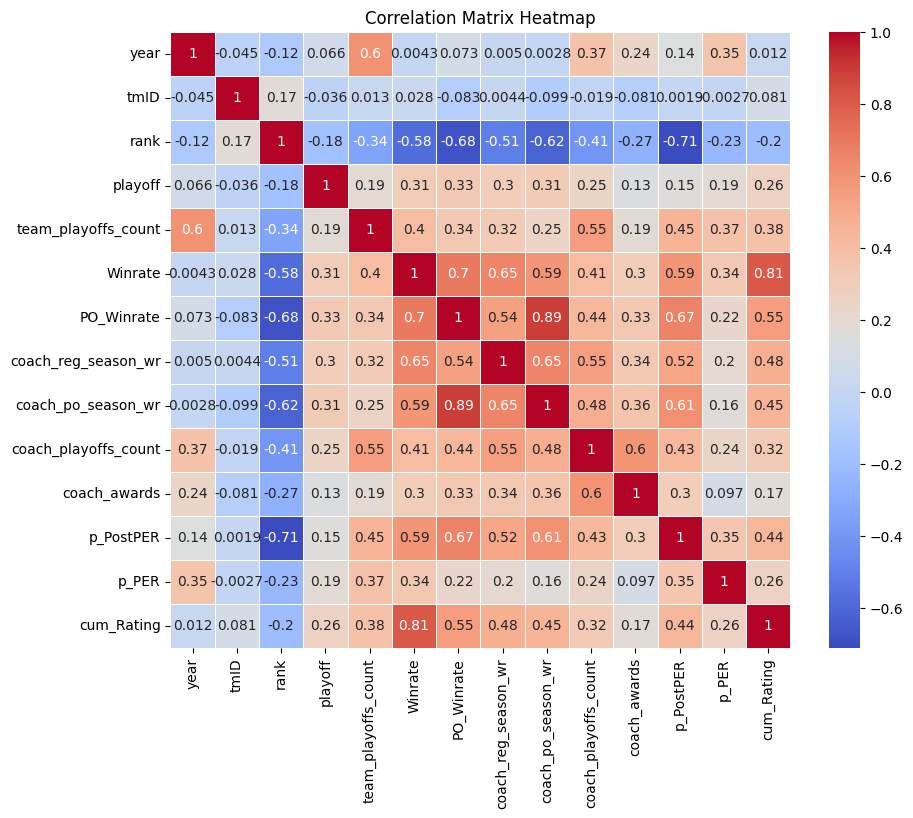

Accuracy: 0.6153846153846154


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

from sklearn.decomposition import PCA

import feature_selection as fs

label_encoder = LabelEncoder()


merged_data = merged_data.drop(columns=['o_fgm', 'o_fga', 'o_ftm', 'o_fta',
       'o_3pm', 'o_3pa', 'o_oreb', 'o_dreb', 'o_reb', 'o_asts', 'o_pf',
       'o_stl', 'o_to', 'o_blk', 'o_pts', 'd_fgm', 'd_fga', 'd_ftm', 'd_fta',
       'd_3pm', 'd_3pa', 'd_oreb', 'd_dreb', 'd_reb', 'd_asts', 'd_pf',
       'd_stl', 'd_to', 'd_blk', 'd_pts', 'min','p_GP', 'p_GS', 'p_minutes',
       'p_points', 'p_oRebounds', 'p_dRebounds', 'p_rebounds', 'p_assists',
       'p_steals', 'p_blocks', 'p_turnovers', 'p_PF', 'p_fgAttempted',
       'p_fgMade', 'p_ftAttempted', 'p_ftMade', 'p_threeAttempted',
       'p_threeMade', 'p_dq', 'p_PostGP', 'p_PostGS', 'p_PostMinutes',
       'p_PostPoints', 'p_PostoRebounds', 'p_PostdRebounds', 'p_PostRebounds',
       'p_PostAssists', 'p_PostSteals', 'p_PostBlocks', 'p_PostTurnovers',
       'p_PostPF', 'p_PostfgAttempted', 'p_PostfgMade', 'p_PostftAttempted',
       'p_PostftMade', 'p_PostthreeAttempted', 'p_PostthreeMade', 'p_PostDQ',
       'p_player_awards'], axis = 1)

"""
merged_data.drop(columns=['o_fgm', 'o_fga', 'o_ftm', 'o_fta',
       'o_3pm', 'o_3pa', 'o_oreb', 'o_dreb', 'o_reb', 'o_asts', 'o_pf',
       'o_stl', 'o_to', 'o_blk', 'o_pts', 'd_fgm', 'd_fga', 'd_ftm', 'd_fta',
       'd_3pm', 'd_3pa', 'd_oreb', 'd_dreb', 'd_reb', 'd_asts', 'd_pf',
       'd_stl', 'd_to', 'd_blk', 'd_pts', 'min','p_minutes'], axis = 1, inplace = True)
"""




merged_data['tmID'] = label_encoder.fit_transform(merged_data['tmID'])
correlation_matrix = merged_data.corr()
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()
#merged_data = fs.aggregate_stats_features(merged_data)

x = merged_data.drop('playoff', axis=1)
y = merged_data['playoff']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

clf = RandomForestClassifier(random_state=42)
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")
